In [1]:
import pandas as pd 
import numpy as np
import json
import requests
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#get file from here 
# https://data.gov.ua/dataset/06779371-308f-42d7-895e-5a39833375f0/resource/c3a12388-55c2-4546-8b71-b4b7ff0d8b16
!head -n 2 tz_opendata_z01012023_po01122023.csv

head: tz_opendata_z01012023_po01122023.csv: No such file or directory


In [108]:
df = pd.read_csv('tz_opendata_z01012023_po01122023.csv', sep =';', low_memory=False)
df.head()

In [7]:
df.head()

,PERSON,REG_ADDR_KOATUU,OPER_CODE,OPER_NAME,D_REG,DEP_CODE,DEP,BRAND,MODEL,VIN,MAKE_YEAR,COLOR,KIND,BODY,PURPOSE,FUEL,CAPACITY,OWN_WEIGHT,TOTAL_WEIGHT,N_REG_NEW
0,P,5.910100e+09,315,ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ У...,28.04.23,12293,ТСЦ 8044,FORD,FIESTA,WF0JXXGAJJCA87281,2012,БІЛИЙ,ЛЕГКОВИЙ,ХЕТЧБЕК,ЗАГАЛЬНИЙ,БЕНЗИН АБО ГАЗ,1388.0,1283.0,1530.0,КА3280КЕ
1,P,8.000000e+09,315,ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ У...,07.07.23,12292,ТСЦ 8043,LEXUS,LS 460 L,JTHDL1EF3A5002582,2010,ЧОРНИЙ,ЛЕГКОВИЙ,СЕДАН,ЗАГАЛЬНИЙ,БЕНЗИН,4608.0,1895.0,2350.0,АА0470ІО
2,P,5.212828e+08,313,ПЕРЕРЕЄСТРАЦІЯ НА НОВОГО ВЛАСНИКА ЗА ДОГ. КУПІ...,03.06.23,12296,ТСЦ 8047,NISSAN,NOTE,SJNFCAE11U2157082,2012,БІЛИЙ,ЛЕГКОВИЙ,ХЕТЧБЕК,ЗАГАЛЬНИЙ,БЕНЗИН,1598.0,1167.0,1580.0,КА7967НК
3,P,8.036600e+09,315,ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ У...,16.05.23,12284,ТСЦ 3245,MITSUBISHI,LANCER,JMBSNCY1ACU001748,2012,СІРИЙ,ЛЕГКОВИЙ,СЕДАН,ЗАГАЛЬНИЙ,БЕНЗИН АБО ГАЗ,1590.0,1305.0,1750.0,АІ4029КО
4,P,8.038900e+09,254,НАЛЕЖНИЙ КОРИСТУВАЧ. РЕЄСТРАЦІЯ,05.09.23,10000,OLD_ДДАІ МВС УКРАЇНИ,TOYOTA,CAMRY,JTNBF4FK003012666,2012,СІРИЙ,ЛЕГКОВИЙ,СЕДАН,ЗАГАЛЬНИЙ,БЕНЗИН,2494.0,1430.0,2100.0,АА2799ХЕ


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953067 entries, 0 to 1953066
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PERSON           object 
 1   REG_ADDR_KOATUU  float64
 2   OPER_CODE        int64  
 3   OPER_NAME        object 
 4   D_REG            object 
 5   DEP_CODE         int64  
 6   DEP              object 
 7   BRAND            object 
 8   MODEL            object 
 9   VIN              object 
 10  MAKE_YEAR        int64  
 11  COLOR            object 
 12  KIND             object 
 13  BODY             object 
 14  PURPOSE          object 
 15  FUEL             object 
 16  CAPACITY         float64
 17  OWN_WEIGHT       object 
 18  TOTAL_WEIGHT     object 
 19  N_REG_NEW        object 
dtypes: float64(2), int64(3), object(15)
memory usage: 298.0+ MB


In [8]:
df['PERSON'].value_counts().head(10)

P    1786207
J     166860
Name: PERSON, dtype: int64

In [9]:
df_prof=df[['PERSON', 'OPER_NAME','D_REG', 'BRAND', 'MODEL', 'MAKE_YEAR', 'COLOR', 'KIND', 'BODY', 'PURPOSE', 'FUEL']]

In [10]:
from ydata_profiling import ProfileReport
ProfileReport(df_prof)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Завантажуємо данні за всі роки і фільтруємо тільки потрібні 
- фізичні особи, 
- первинна реєстрація 
- легкових автомобілів 
- загального призначення. 
- Перетворити поле дат у правильний формат

In [23]:
#Download all zips
# json file is here https://data.gov.ua/dataset/06779371-308f-42d7-895e-5a39833375f0/passport_csv 

# Create a new folder 'files' if it doesn't exist
if not os.path.exists('files'):
    os.makedirs('files')

with open('datapackage.json', 'r') as json_file:
    data = json.load(json_file)

for resource in data['resources']:
    path = resource['path']
    file_name = path.split("/")[-1]

    response = requests.get(path)

    if response.status_code == 200:
        # Save the file in the 'files' folder
        with open(os.path.join('files', file_name), 'wb') as file:
            file.write(response.content)
        print(f"Downloaded: {file_name}")
    else:
        print(f"Failed to download: {file_name}")

print("Download complete.")

Downloaded: tz_opendata_z01012018_po01012019.zip
Downloaded: tz_opendata_z01012017_po31122017.zip
Downloaded: tz_opendata_z01012016_po31122016.zip
Downloaded: tz_opendata_z01012015_po31122015.zip
Downloaded: tz_opendata_z01012014_po31122014.zip
Downloaded: tz_opendata_z01012013_po31122013.zip
Downloaded: tz_opendata_z01012019_po01012020.zip
Downloaded: tz_opendata_z01012020_po01012021.zip
Downloaded: tz_opendata_z01012021_po01012022.zip
Downloaded: reestrtz2022.zip
Downloaded: reestrtz2022.zip
Downloaded: reestrtz2022.zip
Downloaded: reestrtz2023.zip
Download complete.


In [22]:
#Unzip everything 

# List files in the 'files' folder
files = os.listdir('files')

# Iterate through the files and unzip any zip archives
for file_name in files:
    if file_name.endswith('.zip'):
        # Specify the path of the zip file
        zip_path = os.path.join('files', file_name)

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            # Extract files into the 'files' folder
            zip_ref.extractall('files')
            print(f"Extracted: {file_name}")

        # Delete the zip file after extraction
        os.remove(zip_path)
        print(f"Deleted: {file_name}")

print("Extraction of zip files complete.")

BadZipFile: File is not a zip file

In [6]:
# Check files in the 'files' folder
folder_path = os.getcwd()
print("\nFiles in the 'files' folder:")
files_folder_path = os.path.join(folder_path, 'files')
for filename in os.listdir(files_folder_path):
    print(filename)


Files in the 'files' folder:
.DS_Store
tz_opendata_z01012019_po01012020.ásv
tz_opendata_z01012023_po01122023.csv
tz_opendata_z01012020_po01012021.csv
tz_opendata_z01012022_po01012023.csv
tz_opendata_z01012015_po31122015.csv
tz_opendata_z01012013_po31122013.csv
tz_opendata_z01012018_po01012019.csv
tz_opendata_z01012014_po31122014.csv
tz_opendata_z01012016_po31122016.csv
tz_opendata_z01012017_po31122017.csv


In [7]:
# change '.ßsv' file 
for filename in os.listdir(files_folder_path):
    if not filename.endswith('.csv'):
        # Rename the file to end with '.csv'
        new_filename = os.path.splitext(filename)[0] + '.csv'
        os.rename(os.path.join(files_folder_path, filename), os.path.join(files_folder_path, new_filename))
        print('file ', filename, ' renamed')

file  .DS_Store  renamed
file  tz_opendata_z01012019_po01012020.ásv  renamed


In [9]:
#Create a df for all the data 

result_df = pd.DataFrame()

for filename in os.listdir(files_folder_path):
    file_path = os.path.join(files_folder_path, filename)    
    df = pd.read_csv(file_path, sep = ';', low_memory=False)
    df.columns = df.columns.str.upper()        
    result_df = pd.concat([result_df, df], ignore_index=True)
    print(filename, 'added')
print('I\'m done')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 1132: invalid start byte

In [27]:
print(len(result_df)) 

18820028


In [28]:
#checkpoint
all_years = result_df.copy()

In [29]:
#Optional: choose only relevant fields.  
all_years = all_years[['PERSON', 'OPER_CODE', 'OPER_NAME', 'D_REG', 'BRAND', 
                       'MODEL', 'MAKE_YEAR', 'COLOR', 'KIND','BODY',
                      'PURPOSE','FUEL', 'VIN']]

#filter df 
all_years = all_years[(all_years['PERSON']=='P')&
                      (all_years['KIND'] =='ЛЕГКОВИЙ')&
                      (all_years['PURPOSE'] =='ЗАГАЛЬНИЙ')]

In [33]:
#find neccessary codes 
all_years[all_years['OPER_NAME'].str.upper().str.contains('ПЕРВИННА')]['OPER_CODE'].unique()

array([105, 100,  99,  30, 172])

In [34]:
#check the most popular codes, to find out 70 and 71 could also be relevand. I can be wrong =) 
all_years[['OPER_CODE', 'OPER_NAME']].value_counts().head(20) 

OPER_CODE  OPER_NAME                                                                                     
315        ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ УКЛАДЕНОМУ В ТСЦ                                     2577565
308        ПЕРЕРЕЄСТРАЦІЯ НА НОВОГО ВЛАСНИКА ЗА ДОГ. КУПIВЛI-ПРОДАЖУ (СГ)                                    1509798
71         РЕЄСТРАЦІЯ ТЗ ПРИВЕЗЕНОГО З-ЗА КОРДОНУ ПО ПОСВІДЧЕННЮ МИТНИЦІ                                     1034727
530        530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ                                                              1013723
315        315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ УКЛАДЕНОМУ В ТСЦ                                893516
40         40 - ВТОРИННА РЕЄСТРАЦІЯ ТЗ, ПРИДБАНОГО В ТОРГОВЕЛЬНІЙ ОРГАНІЗАЦІЇ                                 878038
400        400 - ПЕРЕРЕЄСТРАЦIЯ ПРИ ПЕРЕОБЛАДНАННI БЕЗ ЗАМIНИ НОМЕРНИХ АГРЕГ.                                 528449
309        309 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВОГО ВЛАСНИКА ЗА ДОВІДКОЙ-РАХУНОК  

In [35]:
#filter df to contain only ПЕРВИННА РЕЄСТРАЦІЯ (and 70, 71 )
list_of_codes = [105, 100,  99,  30, 172, 70, 71]
filtered_df = all_years[all_years['OPER_CODE'].isin(list_of_codes)]
filtered_df.reset_index(inplace=True)

In [36]:
len(filtered_df) 

2806315

In [44]:
#check if unique
filtered_df['VIN'].duplicated().sum() #половина дублікатів чи як? o_O

1546534

In [48]:
duplicates = filtered_df['VIN'].duplicated()
filtered_df[duplicates].tail(6)

,index,PERSON,OPER_CODE,OPER_NAME,D_REG,BRAND,MODEL,MAKE_YEAR,COLOR,KIND,BODY,PURPOSE,FUEL,VIN
2806309,18819973,P,172,"172 - ПЕРВИННА РЕЄСТРАЦІЯ ЛЕГКОВИХ ТЗ, ЯКІ ВВЕ...",2017-12-30,VOLKSWAGEN TOURAN,TOURAN,2011,БІЛИЙ,ЛЕГКОВИЙ,УНІВЕРСАЛ-B,ЗАГАЛЬНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,NaN
2806310,18819986,P,172,"172 - ПЕРВИННА РЕЄСТРАЦІЯ ЛЕГКОВИХ ТЗ, ЯКІ ВВЕ...",2017-12-30,VOLKSWAGEN CADDY,CADDY,2014,ЧЕРВОНИЙ,ЛЕГКОВИЙ,УНІВЕРСАЛ-B,ЗАГАЛЬНИЙ,БЕНЗИН,NaN
2806311,18819989,P,100,100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГ...,2017-12-30,SUZUKI VITARA,VITARA,2017,СІРИЙ,ЛЕГКОВИЙ,ХЕТЧБЕК-В,ЗАГАЛЬНИЙ,БЕНЗИН,NaN
2806312,18820004,P,172,"172 - ПЕРВИННА РЕЄСТРАЦІЯ ЛЕГКОВИХ ТЗ, ЯКІ ВВЕ...",2017-12-30,RENAULT MEGANE,MEGANE,2013,СІРИЙ,ЛЕГКОВИЙ,УНІВЕРСАЛ-B,ЗАГАЛЬНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,NaN
2806313,18820008,P,100,100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГ...,2017-12-30,LAND ROVER DISCOVERY 3.0,DISCOVERY 3.0,2017,БІЛИЙ,ЛЕГКОВИЙ,УНІВЕРСАЛ-B,ЗАГАЛЬНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,NaN
2806314,18820022,P,100,100 - ПЕРВИННА РЕЄСТРАЦIЯ ТЗ ПРИДБАНОГО В ТОРГ...,2017-12-30,FIAT 500L,500L,2017,ЧЕРВОНИЙ,ЛЕГКОВИЙ,ХЕТЧБЕК-В,ЗАГАЛЬНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,NaN


In [50]:
#without NAs 
filtered_df[~filtered_df['VIN'].isna()].duplicated().sum()

0

In [51]:
#only the columns that we are interested in 
firsts_df = filtered_df[['D_REG','BRAND', 'MODEL', 'MAKE_YEAR','COLOR','FUEL']]
firsts_df.to_csv('first_reg_all_years.csv')
firsts_df.head()

,D_REG,BRAND,MODEL,MAKE_YEAR,COLOR,FUEL
0,11.08.2021,AUDI,RS Q8,2021,ЧОРНИЙ,ЕЛЕКТРО АБО БЕНЗИН
1,25.11.2021,HUMMER,H2,2003,ЧОРНИЙ,БЕНЗИН
2,11.08.2021,KIA,CARENS,2008,СІРИЙ,БЕНЗИН АБО ГАЗ
3,12.08.2021,PEUGEOT,308,2008,СІРИЙ,БЕНЗИН
4,14.04.2021,NISSAN,X-TRAIL,2020,КОРИЧНЕВИЙ,БЕНЗИН


In [52]:
firsts_df.dtypes

D_REG        object
BRAND        object
MODEL        object
MAKE_YEAR     int64
COLOR        object
FUEL         object
dtype: object

# Data format check

In [60]:
years = [x+1 for x in range(2012,2023)]
for year in years:
    s = frsts[frsts['D_REG'].str.contains(str(year))]['D_REG']
    print(s.max())

2013-12-30
2014-12-30
2015-12-30
2016-12-30
2017-12-30
2018-12-30
31.10.2019
31.12.2020
31.12.2021
31.12.2022
nan


In [40]:
firsts_df[firsts_df['D_REG'].str.endswith('23')]['D_REG'].head(1)

598223    20.10.23
Name: D_REG, dtype: object

In [61]:
#converting all the dates. It takes a while. 
def convert_date(date_str):
    if '-' in date_str:
        # Dates from 2013 to 2018 are in the format '2013-12-30'
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    elif len(date_str) == 10:
        # Dates from 2019 to 2022 are in the format '31.10.2019'
        return pd.to_datetime(date_str, format='%d.%m.%Y')
    else:
        # Dates in 2023 are in the format '20.10.23'
        return pd.to_datetime(date_str, format='%d.%m.%y')

# Apply the function to the 'D_REG' column
frsts['D_REG'] = frsts['D_REG'].apply(convert_date)

In [62]:
firsts_df.dtypes

NameError: name 'firsts_df' is not defined

# Quick analysis and grouping

In [63]:
frsts = firsts_df.copy()
frsts.head()

,D_REG,BRAND,MODEL,MAKE_YEAR,COLOR,FUEL
0,2021-08-11,AUDI,RS Q8,2021,ЧОРНИЙ,ЕЛЕКТРО АБО БЕНЗИН
1,2021-11-25,HUMMER,H2,2003,ЧОРНИЙ,БЕНЗИН
2,2021-08-11,KIA,CARENS,2008,СІРИЙ,БЕНЗИН АБО ГАЗ
3,2021-08-12,PEUGEOT,308,2008,СІРИЙ,БЕНЗИН
4,2021-04-14,NISSAN,X-TRAIL,2020,КОРИЧНЕВИЙ,БЕНЗИН


In [63]:
frsts.loc[:, 'YEAR'] = frsts['D_REG'].dt.year

In [65]:
# Group by 'YEAR' and count the number of rows for each year
car_count_by_year = frsts.groupby('YEAR').size()

# If you want the result as a DataFrame
car_count_by_year_df = pd.DataFrame(car_count_by_year, columns=['Car Count'])

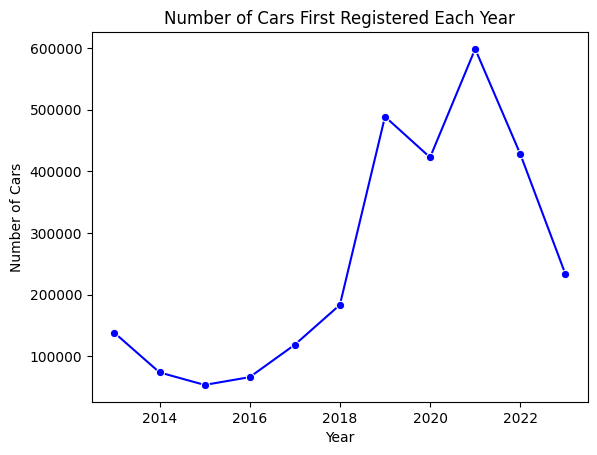

In [66]:
# trend of new cars 
sns.lineplot(x='YEAR', y='Car Count', marker='o', linestyle='-', color='b', data=car_count_by_year_df)
plt.title('Number of Cars First Registered Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()

# cars each year by color 

In [68]:
top_colors_by_year = frsts.groupby('YEAR')['COLOR'].value_counts().reset_index(name='Count')

pivoted_colors_by_year = top_colors_by_year.pivot(index='COLOR', columns='YEAR', values='Count')
pivoted_colors_by_year

YEAR,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
COLOR,,,,,,,,,,,
БІЛИЙ,29991.0,17785.0,10357.0,16575.0,27885.0,39046.0,57632.0,66976.0,85250.0,50241.0,42947.0
БЕЖЕВИЙ,7487.0,3594.0,1605.0,1795.0,2001.0,2547.0,4853.0,4197.0,6608.0,5093.0,2869.0
ЖОВТИЙ,882.0,467.0,337.0,376.0,605.0,802.0,2383.0,1822.0,2270.0,1560.0,647.0
ЗЕЛЕНИЙ,3525.0,1254.0,1149.0,824.0,991.0,2134.0,15901.0,7010.0,14514.0,9817.0,3843.0
КОРИЧНЕВИЙ,6286.0,4495.0,2805.0,4392.0,7937.0,9175.0,12835.0,12570.0,14652.0,9153.0,5530.0
НЕВИЗНАЧЕНИЙ,NaN,3.0,5.0,11.0,5.0,1.0,11.0,12.0,7.0,2.0,1.0
ОРАНЖЕВИЙ,733.0,400.0,213.0,339.0,580.0,902.0,1414.0,1747.0,2730.0,1277.0,812.0
СІРИЙ,42478.0,21017.0,16786.0,19301.0,37175.0,60270.0,190839.0,154659.0,227329.0,170219.0,84593.0
СИНІЙ,9908.0,4871.0,5008.0,5409.0,10282.0,18114.0,69316.0,51759.0,76575.0,53159.0,26509.0


In [101]:
pivoted_colors_by_year.to_csv('colors_by_year.csv')

# Brands by year

In [69]:
frsts[frsts['YEAR']==2013][['BRAND', 'MODEL']].value_counts().head(10)
#this is bad

BRAND             MODEL   
HYUNDAI  ACCENT   ACCENT      3495
ЗАЗ  SENS         SENS        3186
KIA  RIO          RIO         2968
RENAULT  LOGAN    LOGAN       2584
ЗАЗ  VIDA         VIDA        2433
VOLKSWAGEN  POLO  POLO        2169
KIA  SPORTAGE     SPORTAGE    1973
ЗАЗ  LANOS        LANOS       1919
NISSAN  QASHQAI   QASHQAI     1911
FORD  FOCUS       FOCUS       1896
dtype: int64

In [73]:
#only the first word of 'wrong' brands will be a brand 
frsts.loc[:,'brand_only'] = frsts['BRAND'].apply(lambda x: x.split()[0])

In [82]:
frsts['brand_only'].nunique()

230

In [83]:
frsts['brand_only'].value_counts().tail(10)

IM            1
LUCID         1
SPYKER        1
DAYUN         1
OLDSMOBILE    1
KRASZ         1
ASIA          1
СЕАЗ          1
SANTANA       1
БРОНТО        1
Name: brand_only, dtype: int64

In [64]:
brands_by_year_all = frsts.groupby('YEAR')['brand_only'].value_counts().reset_index(name='Count')

# Rank the brands within each year 
brands_by_year_all.loc[:,'rank'] = brands_by_year_all.groupby('YEAR')['Count'].rank(method='dense', ascending=False)

# Filter out the top 10 brands for each year
top_brands_df = brands_by_year_all[brands_by_year_all['rank'] <= 10]

# Sorting by year and rank for better readability
top_brands_df = top_brands_df.sort_values(by=['YEAR', 'rank'])

# Reset index for the final DataFrame
top_brands_df.reset_index(drop=True, inplace=True)

In [65]:
top_brands_df

,YEAR,brand_only,Count,rank
0,2013,HYUNDAI,10960,1.0
1,2013,TOYOTA,10515,2.0
2,2013,GEELY,9397,3.0
3,2013,ЗАЗ,8502,4.0
4,2013,NISSAN,8419,5.0
...,...,...,...,...
105,2023,FORD,12400,6.0
106,2023,BMW,11126,7.0
107,2023,TOYOTA,9757,8.0
108,2023,HYUNDAI,8398,9.0


In [100]:
#same pivoting as with colors 
pivoted_brands_by_year_all = top_brands_df.pivot(index='brand_only', columns='YEAR', values='rank')

In [66]:
#same pivoting as with colors 
pivoted_brands_counts = top_brands_df.pivot(index='brand_only', columns='YEAR', values='Count')

In [68]:
pivoted_brands_counts.to_csv('pivoted_brands_counts.csv')

In [103]:
pivoted_brands_by_year_all

YEAR,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
brand_only,,,,,,,,,,,
AUDI,NaN,NaN,NaN,NaN,NaN,10.0,6.0,NaN,8.0,6.0,5.0
BMW,NaN,NaN,NaN,7.0,10.0,9.0,7.0,NaN,NaN,7.0,7.0
FORD,10.0,8.0,8.0,9.0,9.0,5.0,5.0,3.0,3.0,3.0,6.0
GEELY,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HYUNDAI,1.0,5.0,6.0,10.0,NaN,8.0,10.0,5.0,6.0,NaN,9.0
KIA,7.0,10.0,9.0,5.0,6.0,NaN,NaN,9.0,10.0,NaN,NaN
MAZDA,NaN,NaN,7.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
MERCEDES-BENZ,NaN,NaN,10.0,6.0,7.0,NaN,9.0,NaN,NaN,8.0,NaN
NISSAN,5.0,7.0,5.0,4.0,5.0,6.0,NaN,8.0,7.0,9.0,4.0


In [104]:
pivoted_brands_by_year_all.to_csv('brands_by_year_all.csv')

# share of electric cars 

In [105]:
fuel_by_year = frsts.groupby(['YEAR', 'FUEL']).size().reset_index(name='Count')

pivoted_fuel_by_year = fuel_by_year.pivot(index='FUEL', columns='YEAR', values='Count')

pivoted_fuel_by_year['electro'] = pivoted_fuel_by_year.index.str.contains('ЕЛЕКТРО')
electro = pivoted_fuel_by_year.groupby('electro').sum()
electro = electro.T
electro

electro,False,True
YEAR,,
2013,138061.0,83.0
2014,73925.0,217.0
2015,53178.0,695.0
2016,64644.0,1862.0
2017,114755.0,4314.0
2018,174842.0,8732.0
2019,474533.0,13961.0
2020,405908.0,16537.0
2021,575378.0,22801.0


<BarContainer object of 11 artists>

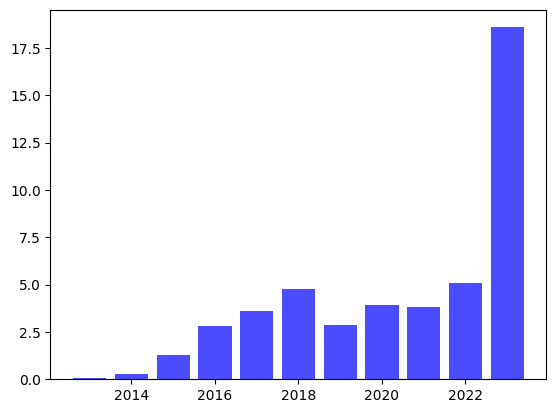

In [106]:
electro['year_total'] = electro[True] + electro[False]
electro['share_true'] = electro[True] / electro['year_total']
plt.bar(electro.index, electro['share_true'] * 100, color='blue', alpha=0.7)

# top 10 brands all times by color

In [24]:
frsts = pd.read_csv("first_reg_all_years.csv")


,Unnamed: 0,D_REG,BRAND,MODEL,MAKE_YEAR,COLOR,FUEL
0,0,11.08.2021,AUDI,RS Q8,2021,ЧОРНИЙ,ЕЛЕКТРО АБО БЕНЗИН
1,1,25.11.2021,HUMMER,H2,2003,ЧОРНИЙ,БЕНЗИН
2,2,11.08.2021,KIA,CARENS,2008,СІРИЙ,БЕНЗИН АБО ГАЗ
3,3,12.08.2021,PEUGEOT,308,2008,СІРИЙ,БЕНЗИН
4,4,14.04.2021,NISSAN,X-TRAIL,2020,КОРИЧНЕВИЙ,БЕНЗИН
...,...,...,...,...,...,...,...
2806310,2806310,2017-12-30,VOLKSWAGEN CADDY,CADDY,2014,ЧЕРВОНИЙ,БЕНЗИН
2806311,2806311,2017-12-30,SUZUKI VITARA,VITARA,2017,СІРИЙ,БЕНЗИН
2806312,2806312,2017-12-30,RENAULT MEGANE,MEGANE,2013,СІРИЙ,ДИЗЕЛЬНЕ ПАЛИВО
2806313,2806313,2017-12-30,LAND ROVER DISCOVERY 3.0,DISCOVERY 3.0,2017,БІЛИЙ,ДИЗЕЛЬНЕ ПАЛИВО


In [25]:
frsts.loc[:,'brand_only'] = frsts['BRAND'].apply(lambda x: x.split()[0])

In [34]:
top_15_brands = frsts['brand_only'].value_counts().head(15)
top_15_brand_list = top_15_brands.index.tolist()

In [35]:
top_15_brand_list

['VOLKSWAGEN',
 'RENAULT',
 'FORD',
 'SKODA',
 'OPEL',
 'TOYOTA',
 'NISSAN',
 'HYUNDAI',
 'AUDI',
 'BMW',
 'KIA',
 'MERCEDES-BENZ',
 'MAZDA',
 'PEUGEOT',
 'CITROEN']

In [36]:
filtered_frsts = frsts[frsts['brand_only'].isin(top_15_brand_list)]

In [37]:
pivot_table = filtered_frsts.pivot_table(index='brand_only', columns='COLOR', aggfunc='size', fill_value=0)

In [40]:
pivot_table.drop('НЕВИЗНАЧЕНИЙ', axis=1, inplace=True)

In [52]:
# Assuming you want to sort by the first column in the descending sorted list of columns
first_column = pivot_table.columns[0]
pivot_table = pivot_table.sort_values(by=first_column, ascending=False)


In [55]:
# Transpose the DataFrame
pivot_table_transposed = pivot_table.T

# Sort by the first column (originally the first row)
pivot_table_transposed = pivot_table_transposed.sort_values(by=pivot_table_transposed.columns[0], ascending=False)

# Transpose it back
pivot_table_sorted = pivot_table_transposed.T

In [57]:
pivot_table_sorted.to_csv('colors_and_brands.csv')

In [77]:
for_heatmap = filtered_frsts.groupby('COLOR')['brand_only'].value_counts().reset_index(name='Count')
for_heatmap = for_heatmap[for_heatmap['COLOR']!='НЕВИЗНАЧЕНИЙ']

In [81]:
for_heatmap = for_heatmap.sort_values(by = 'Count', ascending = False)

In [82]:
for_heatmap.to_csv('for_heatmap.csv')